In [1]:
#### install d2 in colab / linux env

%%capture out
!pip install pyyaml==5.1

import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/$CUDA_VERSION/torch$TORCH_VERSION/index.html

# exit(0)  # After installation, you may need to "restart runtime" in Colab. This line can also restart runtime

In [2]:
# GeneralizedRCNN(
#   (backbone): FPN(
#     (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
#     (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
#     (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
#     (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
#     (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
#     (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
#     (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
#     (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
#     (top_block): LastLevelMaxPool()
#     (bottom_up): ResNet(
#       (stem): BasicStem(
#         (conv1): Conv2d(
#           3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
#           (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
#         )
#       )
#       (res2): Sequential(
#         (0): BottleneckBlock(
#           (shortcut): Conv2d(
#             64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
#           )
#           (conv1): Conv2d(
#             64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
#           )
#           (conv2): Conv2d(
#             64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
#           )
#           (conv3): Conv2d(
#             64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
#           )
#         )
#         (1): BottleneckBlock(
#           (conv1): Conv2d(
#             256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
#           )
#           (conv2): Conv2d(
#             64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
#           )
#           (conv3): Conv2d(
#             64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
#           )
#         )
#         (2): BottleneckBlock(
#           (conv1): Conv2d(
#             256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
#           )
#           (conv2): Conv2d(
#             64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
#           )
#           (conv3): Conv2d(
#             64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
#           )
#         )
#       )
#       (res3): Sequential(
#         (0): BottleneckBlock(
#           (shortcut): Conv2d(
#             256, 512, kernel_size=(1, 1), stride=(2, 2), bias=False
#             (norm): FrozenBatchNorm2d(num_features=512, eps=1e-05)
#           )
#           (conv1): Conv2d(
#             256, 128, kernel_size=(1, 1), stride=(2, 2), bias=False
#             (norm): FrozenBatchNorm2d(num_features=128, eps=1e-05)
#           )
#           (conv2): Conv2d(
#             128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=128, eps=1e-05)
#           )
#           (conv3): Conv2d(
#             128, 512, kernel_size=(1, 1), stride=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=512, eps=1e-05)
#           )
#         )
#         (1): BottleneckBlock(
#           (conv1): Conv2d(
#             512, 128, kernel_size=(1, 1), stride=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=128, eps=1e-05)
#           )
#           (conv2): Conv2d(
#             128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=128, eps=1e-05)
#           )
#           (conv3): Conv2d(
#             128, 512, kernel_size=(1, 1), stride=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=512, eps=1e-05)
#           )
#         )
#         (2): BottleneckBlock(
#           (conv1): Conv2d(
#             512, 128, kernel_size=(1, 1), stride=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=128, eps=1e-05)
#           )
#           (conv2): Conv2d(
#             128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=128, eps=1e-05)
#           )
#           (conv3): Conv2d(
#             128, 512, kernel_size=(1, 1), stride=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=512, eps=1e-05)
#           )
#         )
#         (3): BottleneckBlock(
#           (conv1): Conv2d(
#             512, 128, kernel_size=(1, 1), stride=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=128, eps=1e-05)
#           )
#           (conv2): Conv2d(
#             128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=128, eps=1e-05)
#           )
#           (conv3): Conv2d(
#             128, 512, kernel_size=(1, 1), stride=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=512, eps=1e-05)
#           )
#         )
#       )
#       (res4): Sequential(
#         (0): BottleneckBlock(
#           (shortcut): Conv2d(
#             512, 1024, kernel_size=(1, 1), stride=(2, 2), bias=False
#             (norm): FrozenBatchNorm2d(num_features=1024, eps=1e-05)
#           )
#           (conv1): Conv2d(
#             512, 256, kernel_size=(1, 1), stride=(2, 2), bias=False
#             (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
#           )
#           (conv2): Conv2d(
#             256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
#           )
#           (conv3): Conv2d(
#             256, 1024, kernel_size=(1, 1), stride=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=1024, eps=1e-05)
#           )
#         )
#         (1): BottleneckBlock(
#           (conv1): Conv2d(
#             1024, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
#           )
#           (conv2): Conv2d(
#             256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
#           )
#           (conv3): Conv2d(
#             256, 1024, kernel_size=(1, 1), stride=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=1024, eps=1e-05)
#           )
#         )
#         (2): BottleneckBlock(
#           (conv1): Conv2d(
#             1024, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
#           )
#           (conv2): Conv2d(
#             256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
#           )
#           (conv3): Conv2d(
#             256, 1024, kernel_size=(1, 1), stride=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=1024, eps=1e-05)
#           )
#         )
#         (3): BottleneckBlock(
#           (conv1): Conv2d(
#             1024, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
#           )
#           (conv2): Conv2d(
#             256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
#           )
#           (conv3): Conv2d(
#             256, 1024, kernel_size=(1, 1), stride=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=1024, eps=1e-05)
#           )
#         )
#         (4): BottleneckBlock(
#           (conv1): Conv2d(
#             1024, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
#           )
#           (conv2): Conv2d(
#             256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
#           )
#           (conv3): Conv2d(
#             256, 1024, kernel_size=(1, 1), stride=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=1024, eps=1e-05)
#           )
#         )
#         (5): BottleneckBlock(
#           (conv1): Conv2d(
#             1024, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
#           )
#           (conv2): Conv2d(
#             256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
#           )
#           (conv3): Conv2d(
#             256, 1024, kernel_size=(1, 1), stride=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=1024, eps=1e-05)
#           )
#         )
#       )
#       (res5): Sequential(
#         (0): BottleneckBlock(
#           (shortcut): Conv2d(
#             1024, 2048, kernel_size=(1, 1), stride=(2, 2), bias=False
#             (norm): FrozenBatchNorm2d(num_features=2048, eps=1e-05)
#           )
#           (conv1): Conv2d(
#             1024, 512, kernel_size=(1, 1), stride=(2, 2), bias=False
#             (norm): FrozenBatchNorm2d(num_features=512, eps=1e-05)
#           )
#           (conv2): Conv2d(
#             512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=512, eps=1e-05)
#           )
#           (conv3): Conv2d(
#             512, 2048, kernel_size=(1, 1), stride=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=2048, eps=1e-05)
#           )
#         )
#         (1): BottleneckBlock(
#           (conv1): Conv2d(
#             2048, 512, kernel_size=(1, 1), stride=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=512, eps=1e-05)
#           )
#           (conv2): Conv2d(
#             512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=512, eps=1e-05)
#           )
#           (conv3): Conv2d(
#             512, 2048, kernel_size=(1, 1), stride=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=2048, eps=1e-05)
#           )
#         )
#         (2): BottleneckBlock(
#           (conv1): Conv2d(
#             2048, 512, kernel_size=(1, 1), stride=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=512, eps=1e-05)
#           )
#           (conv2): Conv2d(
#             512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=512, eps=1e-05)
#           )
#           (conv3): Conv2d(
#             512, 2048, kernel_size=(1, 1), stride=(1, 1), bias=False
#             (norm): FrozenBatchNorm2d(num_features=2048, eps=1e-05)
#           )
#         )
#       )
#     )
#   )
#   (proposal_generator): RPN(
#     (rpn_head): StandardRPNHead(
#       (conv): Conv2d(
#         256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)
#         (activation): ReLU()
#       )
#       (objectness_logits): Conv2d(256, 3, kernel_size=(1, 1), stride=(1, 1))
#       (anchor_deltas): Conv2d(256, 12, kernel_size=(1, 1), stride=(1, 1))
#     )
#     (anchor_generator): DefaultAnchorGenerator(
#       (cell_anchors): BufferList()
#     )
#   )
#   (roi_heads): StandardROIHeads(
#     (box_pooler): ROIPooler(
#       (level_poolers): ModuleList(
#         (0): ROIAlign(output_size=(7, 7), spatial_scale=0.25, sampling_ratio=0, aligned=True)
#         (1): ROIAlign(output_size=(7, 7), spatial_scale=0.125, sampling_ratio=0, aligned=True)
#         (2): ROIAlign(output_size=(7, 7), spatial_scale=0.0625, sampling_ratio=0, aligned=True)
#         (3): ROIAlign(output_size=(7, 7), spatial_scale=0.03125, sampling_ratio=0, aligned=True)
#       )
#     )
#     (box_head): FastRCNNConvFCHead(
#       (flatten): Flatten(start_dim=1, end_dim=-1)
#       (fc1): Linear(in_features=12544, out_features=1024, bias=True)
#       (fc_relu1): ReLU()
#       (fc2): Linear(in_features=1024, out_features=1024, bias=True)
#       (fc_relu2): ReLU()
#     )
#     (box_predictor): FastRCNNOutputLayers(
#       (cls_score): Linear(in_features=1024, out_features=101, bias=True)
#       (bbox_pred): Linear(in_features=1024, out_features=400, bias=True)
#     )
#     (mask_pooler): ROIPooler(
#       (level_poolers): ModuleList(
#         (0): ROIAlign(output_size=(14, 14), spatial_scale=0.25, sampling_ratio=0, aligned=True)
#         (1): ROIAlign(output_size=(14, 14), spatial_scale=0.125, sampling_ratio=0, aligned=True)
#         (2): ROIAlign(output_size=(14, 14), spatial_scale=0.0625, sampling_ratio=0, aligned=True)
#         (3): ROIAlign(output_size=(14, 14), spatial_scale=0.03125, sampling_ratio=0, aligned=True)
#       )
#     )
#     (mask_head): MaskRCNNConvUpsampleHead(
#       (mask_fcn1): Conv2d(
#         256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)
#         (activation): ReLU()
#       )
#       (mask_fcn2): Conv2d(
#         256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)
#         (activation): ReLU()
#       )
#       (mask_fcn3): Conv2d(
#         256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)
#         (activation): ReLU()
#       )
#       (mask_fcn4): Conv2d(
#         256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)
#         (activation): ReLU()
#       )
#       (deconv): ConvTranspose2d(256, 256, kernel_size=(2, 2), stride=(2, 2))
#       (deconv_relu): ReLU()
#       (predictor): Conv2d(256, 100, kernel_size=(1, 1), stride=(1, 1))
#     )
#   )
# )

In [1]:
from collections import namedtuple


class ShapeSpec(namedtuple("_ShapeSpec", ["channels", "height", "width", "stride"])):
    """
    A simple structure that contains basic shape specification about a tensor.
    It is often used as the auxiliary inputs/outputs of models,
    to complement the lack of shape inference ability among pytorch modules.
    Attributes:
        channels:
        height:
        width:
        stride:
    """

    def __new__(cls, channels=None, height=None, width=None, stride=None):
        return super().__new__(cls, channels, height, width, stride)

shape_specs = ShapeSpec(channels=3)

In [2]:
import torch.nn.functional as F
from torch import nn


class LastLevelMaxPool(nn.Module):
    """
    This module is used in the original FPN to generate a downsampled
    P6 feature from P5.
    """

    def __init__(self):
        super().__init__()
        self.num_levels = 1
        self.in_feature = "p5"

    def forward(self, x):
        return [F.max_pool2d(x, kernel_size=1, stride=2, padding=0)]

In [5]:
from pprint import pprint
from detectron2.config import get_cfg
from detectron2.modeling.backbone import build_resnet_backbone
from detectron2.modeling.backbone.fpn import FPN
from detectron2 import model_zoo

cfg = model_zoo.get_config("Misc/scratch_mask_rcnn_R_50_FPN_3x_gn.yaml")
# pprint(cfg.MODEL)

bottom_up = build_resnet_backbone(cfg, input_shape=shape_specs)

in_features = ['res2', 'res3', 'res4', 'res5']
out_channels = 256
fuse_type='sum'
fpn_norm='GN'
# cfg.MODEL.FPN.IN_FEATURES, cfg.MODEL.FPN.OUT_CHANNELS, cfg.MODEL.FPN.FUSE_TYPE, cfg.MODEL.FPN.NORM,
# (['res2', 'res3', 'res4', 'res5'], 256, 'sum', 'GN')

bb = FPN(
      bottom_up=bottom_up,
      in_features=in_features,
      out_channels=out_channels,
      norm=fpn_norm,
      top_block=LastLevelMaxPool(),
      fuse_type=fuse_type,
  )

In [9]:
import torch

x = torch.zeros(1, 3, 256, 256)
out = bb(x)
out.keys()

dict_keys(['p2', 'p3', 'p4', 'p5', 'p6'])

In [10]:
!pip install torchviz --quiet

In [25]:
from torchviz import make_dot

 
# dg = make_dot(out['p2'].mean(), params=dict(bb.named_parameters()))
dg = make_dot(out['p2'].mean(), params=dict(bb.named_parameters()), show_attrs=True, show_saved=True)
dg.render(directory='output', view=True)  

'output/Digraph.gv.pdf'

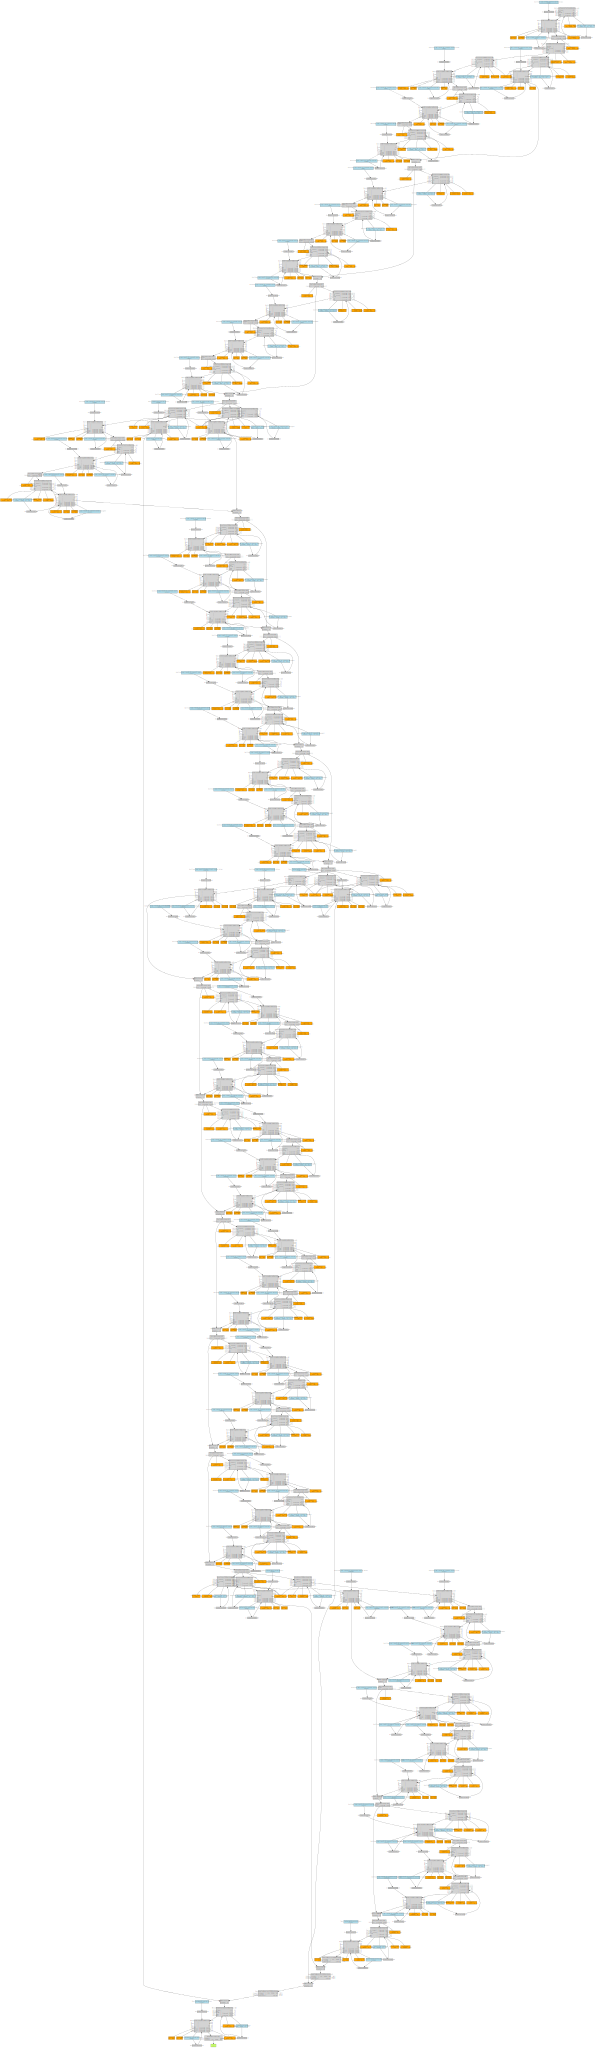

In [26]:
dg